In [2]:
import pandas as pd
import os
import mglearn

adult_path = os.path.join(mglearn.datasets.DATA_PATH, 'adult.data')
data = pd.read_csv(adult_path, header=None, index_col=False, 
                  names = ['age', 'workclass' ,'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain','capital-loss', 'hours-per-week', 'native-country', 'income' ])

data= data[['age', 'workclass', 'education', 'gender', 'hours-per-week','occupation', 'income']]

display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [6]:
print(data.occupation.value_counts())

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [7]:
print('Original feature: \n',list(data.columns), '\n')

Original feature: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 



In [8]:
data_dummies=pd.get_dummies(data)

In [9]:
print(f'Features after get_dummies: \n', list(data_dummies.columns))

Features after get_dummies: 
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupati

In [10]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
features = data_dummies.loc[:, 'age': 'occupation_ Transport-moving']

X = features.values
y=data_dummies['income_ >50K'].values
print(f'X.shape: {X.shape} y_shape: {y.shape}')

X.shape: (32561, 44) y_shape: (32561,)


In [12]:
from  sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y ,random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(f'Test score: {logreg.score(X_test, y_test): .3f}')

Test score:  0.807


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
demo_df = pd.DataFrame({'Integer Feature': [0,1,2,1], 'Categorical Feature':['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [14]:
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [15]:
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


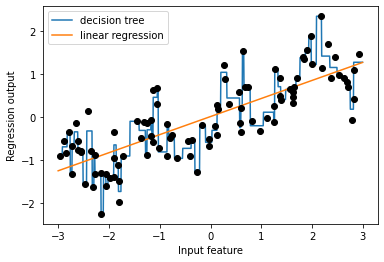

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy  as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000,  endpoint=False).reshape(-1,1)
reg = DecisionTreeRegressor(min_samples_split=3).fit(X,y)
plt.plot(line,reg.predict(line), label='decision tree')

reg = LinearRegression().fit(X,y)
plt.plot(line, reg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [27]:
bins =np.linspace(-3,3,11)
print(f'bins: {bins}')

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [28]:
which_bins = np.digitize(X, bins = bins)
print(f'\nData points: {X[:5]}')
print(f'\nBin membership for data points: {which_bins[:5]}')


Data points: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points: [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [30]:
from  sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit(which_bins)
X_binned = encoder.transform(which_bins)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [31]:
print(f'X_binned.shape: {X_binned.shape}')

X_binned.shape: (100, 10)


Text(0.5, 0, 'Input  feature')

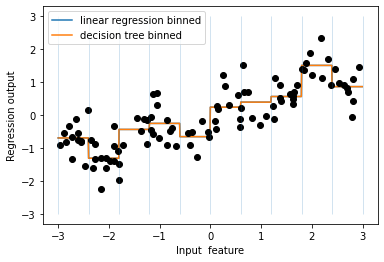

In [32]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg=  DecisionTreeRegressor(min_samples_split=3).fit(X_binned,y)
plt.plot(line , reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input  feature')

In [34]:
X_combined  = np.hstack([X, X_binned])
print(X_combined)
print(X_combined.shape)

[[-0.75275929  0.          0.         ...  0.          0.
   0.        ]
 [ 2.70428584  0.          0.         ...  0.          0.
   1.        ]
 [ 1.39196365  0.          0.         ...  1.          0.
   0.        ]
 ...
 [-0.43475389  0.          0.         ...  0.          0.
   0.        ]
 [-2.84748524  1.          0.         ...  0.          0.
   0.        ]
 [-2.35265144  0.          1.         ...  0.          0.
   0.        ]]
(100, 11)


[[-3.     1.     0.    ...  0.     0.     0.   ]
 [-2.994  1.     0.    ...  0.     0.     0.   ]
 [-2.988  1.     0.    ...  0.     0.     0.   ]
 ...
 [ 2.982  0.     0.    ...  0.     0.     1.   ]
 [ 2.988  0.     0.    ...  0.     0.     1.   ]
 [ 2.994  0.     0.    ...  0.     0.     1.   ]]


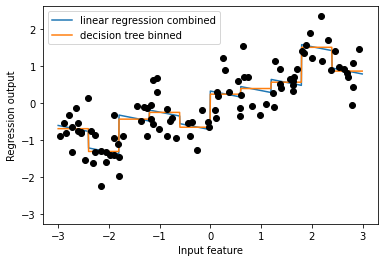

In [40]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
print(line_combined)
plt.plot(line, reg.predict(line_combined), label='linear regression combined')
reg = LinearRegression().fit(X_binned,y)
plt.plot(line , reg.predict(line_binned), label='decision tree binned')

for bin in bins:
    plt.plot([bin, bin], [-3,-3], ':', c='k')
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

In [41]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


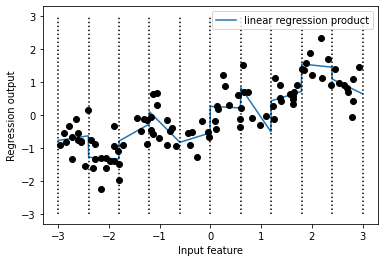

In [42]:
reg  = LinearRegression().fit(X_product, y)

line_product =  np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3,3], ':', c='k')
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc ='best')

In [43]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [44]:
print(f'X_poly.shape: {X_poly.shape}')

X_poly.shape: (100, 10)


In [45]:
print(f'Entries of X: {X[:5]}')
print(f'Entries of X_poly: {X_poly[:5]}')

Entries of X: [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly: [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [46]:
print(f'Polynomial feature names:\n{poly.get_feature_names()}')

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


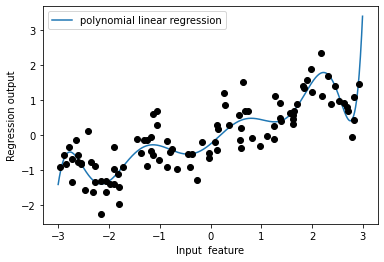

In [47]:
reg = LinearRegression().fit(X_poly,y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input  feature')
plt.legend(loc='best')

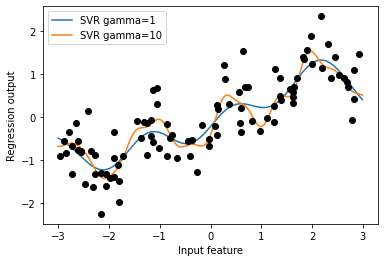

In [48]:
from sklearn.svm import SVR

for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
plt.plot(X[:,  0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [52]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train , y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

In [55]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(f'X_train.shape: {X_train.shape}')
print(f'X_train_poly.shape: {X_train_poly.shape}')

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


In [56]:
print(f'Polynomial feature names: {poly.get_feature_names()}')

Polynomial feature names: ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [57]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print(f'Score without interactions: {ridge.score(X_test_scaled,y_test):.3f}')
ridge = Ridge().fit(X_train_poly, y_train)
print(f'Score with interactions: {ridge.score(X_test_poly, y_test)}')

Score without interactions: 0.621
Score with interactions: 0.7534782020980573


In [58]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print(f'Score without interactions: {rf.score(X_test_scaled, y_test)}')
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print(f'Score with  interactions: {rf.score(X_test_poly, y_test)}')

Score without interactions: 0.801270078830351
Score with  interactions: 0.7689075306569264


In [59]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

print(X_org)

[[ 1.76405235  0.40015721  0.97873798]
 [ 2.2408932   1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721 -0.10321885]
 ...
 [-1.30322008  0.46675065  0.16110632]
 [ 0.32003193  2.07917666 -0.90746598]
 [-0.19240421 -1.21251574 -0.08059852]]


In [60]:
w

array([ 1.59327362,  0.5687224 , -0.11448705])

In [76]:
X = rnd.poisson(10 *np.exp(X_org))
y = np.dot(X_org, w)

In [77]:
print(X)

[[ 40  16  30]
 [113  65   5]
 [ 26  11  13]
 ...
 [  4  23  11]
 [ 11  85   4]
 [ 13   4   4]]


In [78]:
print(f'Number of feature apprearances: \n{np.bincount(X[:, 0])}')

Number of feature apprearances: 
[22 39 61 48 48 66 63 50 42 39 37 38 29 35 33 25 18 20 26 19 17  9 19 11
  9  9 15 10 10  7  8  6  6  2  6  3  3  7  3  2  2  4  3  7  3  1  5  1
  3  3  1  2  1  1  4  2  1  3  3  1  2  0  0  0  0  1  1  0  0  1  1  1
  1  0  0  0  2  1  0  1  0  1  1  2  0  1  1  1  1  0  0  0  0  0  0  0
  0  1  0  1  0  0  2  0  0  0  0  1  0  0  0  0  0  1  0  0  1  0  0  0
  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

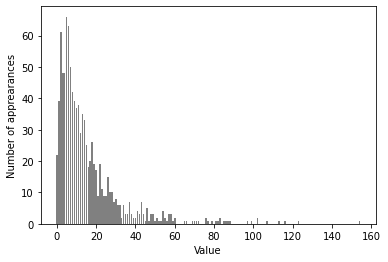

In [79]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel('Number of apprearances')
plt.xlabel('Value')

In [80]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print(f'Test score : {score}')

Test score : 0.6132581517230151


In [81]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

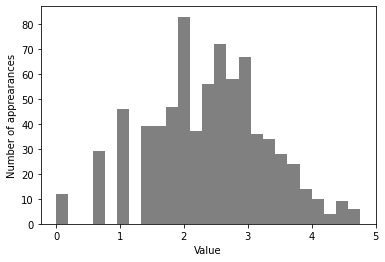

In [82]:
plt.hist(X_train_log[:, 0], bins=25, color='grey')
plt.ylabel('Number of apprearances')
plt.xlabel('Value')

In [84]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print(f'Test score : {score}')

Test score : 0.8791836783261611


In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

print(cancer.data.shape)

X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)

print(f'X_train.shape: {X_train.shape}')
print(f'X_train_selected.shape: {X_train_selected.shape}')

(569, 30)
X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

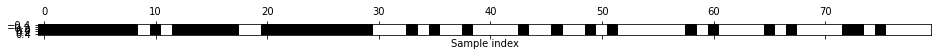

In [88]:
mask = select.get_support()
print(mask)

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('Sample index')

In [91]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f'Score with all features: {lr.score(X_test, y_test)}')
lr.fit(X_train_selected, y_train)
print(f'Score with only selected features: {lr.score(X_test_selected, y_test)}')

Score with all features: 0.9157894736842105
Score with only selected features: 0.9122807017543859


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [92]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold='median')


In [94]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print(f'X_train.shape: {X_train.shape}')
print(f'X_train_l1.shape: {X_train_l1.shape}')

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, 'sample index')

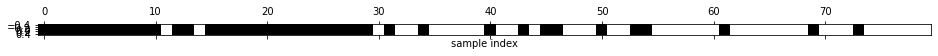

In [96]:
mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap='gray_r')
plt.xlabel('sample index')

In [97]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print(f'Test score: {score}')

Test score: 0.9298245614035088


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 0, 'Sample index')

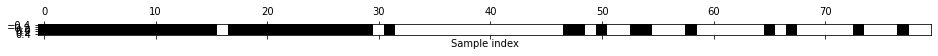

In [98]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators=100,random_state=42), n_features_to_select=40)

select.fit(X_train, y_train)
mask = select.get_support()

plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [101]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print(f'Test score: {score}')

Test score: 0.9298245614035088


/Users/kazuyaaoki/.pyenv/versions/3.10.3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
print(f'Test score: {select.score(X_test, y_test)}')

Test score: 0.9508771929824561


In [105]:
citibike = mglearn.datasets.load_citibike()

In [107]:
print(f'Citi Bike data:\n{citibike.head()}')

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, 'Rentals')

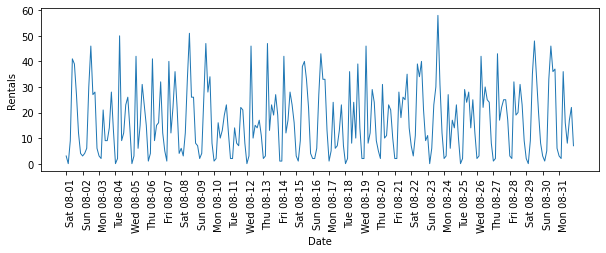

In [108]:
plt.figure(figsize=(10,3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot(citibike, linewidth=1)
plt.xlabel('Date')
plt.ylabel('Rentals')

In [147]:
y = citibike.values

X = citibike.index.astype('int64').to_numpy().reshape(-1,1) // 10 **9

print(X)
print(y)

[[1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]
 [1438462800]
 [1438473600]
 [1438484400]
 [1438495200]
 [1438506000]
 [1438516800]
 [1438527600]
 [1438538400]
 [1438549200]
 [1438560000]
 [1438570800]
 [1438581600]
 [1438592400]
 [1438603200]
 [1438614000]
 [1438624800]
 [1438635600]
 [1438646400]
 [1438657200]
 [1438668000]
 [1438678800]
 [1438689600]
 [1438700400]
 [1438711200]
 [1438722000]
 [1438732800]
 [1438743600]
 [1438754400]
 [1438765200]
 [1438776000]
 [1438786800]
 [1438797600]
 [1438808400]
 [1438819200]
 [1438830000]
 [1438840800]
 [1438851600]
 [1438862400]
 [1438873200]
 [1438884000]
 [1438894800]
 [1438905600]
 [1438916400]
 [1438927200]
 [1438938000]
 [1438948800]
 [1438959600]
 [1438970400]
 [1438981200]
 [1438992000]
 [1439002800]
 [1439013600]
 [1439024400]
 [1439035200]
 [1439046000]
 [1439056800]
 [1439067600]
 [1439078400]
 [1439089200]
 [1439100000]
 [1439110800]
 [1439121600]
 [1439132400]
 [1439143200]
 [1439

In [151]:
n_train = 184

def eval_on_features(features, target, regressor):
    n_train = 184

    X_train , X_test = features[:n_train], features[n_train:]
    
    y_train, y_test  = target[:n_train], target[n_train:]

    regressor.fit(X_train, y_train)
    print(f'Test-set R^2: {regressor.score(X_test, y_test)}')
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10,3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime('%a %m-%d'), rotation=90, ha='left')
    
    plt.plot(range(n_train), y_train, label='train')
    plt.plot(range(n_train, len(y_test)+ n_train), y_test, '-', label='test')
    plt.plot(range(n_train), y_pred_train, '--', label='prediction train')
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label='prediction test')
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel('Date')
    plt.ylabel('Rentals')

Test-set R^2: -0.035486463625959086


<Figure size 432x288 with 0 Axes>

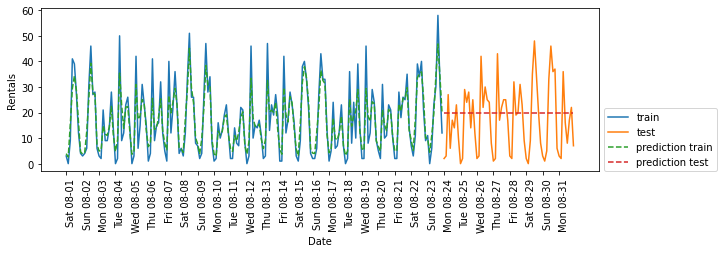

In [152]:
from  sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

In [153]:
print('sample')

sample
